In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#To read CSV file
data = pd.read_csv("C:\\Users\\91859\\Downloads\\gender_submission.csv")

In [4]:
data.shape

(418, 2)

In [5]:
data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
data.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [8]:
data.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [9]:
data.nunique()

PassengerId    418
Survived         2
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.0,996.25,1100.5,1204.75,1309.0
Survived,418.0,0.363636,0.481622,0.0,0.00,0.0,1.00,1.0


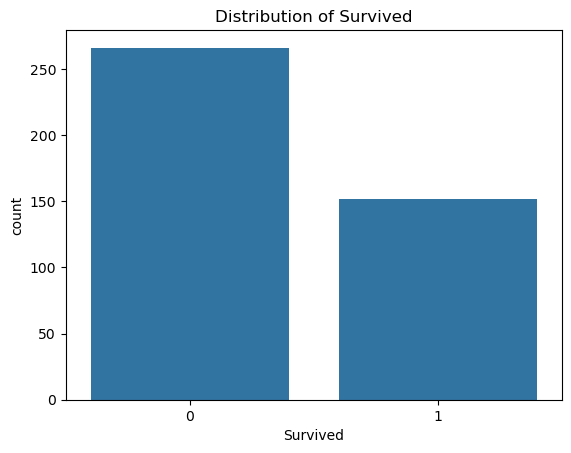

In [11]:
sns.countplot(x='Survived', data=data)
plt.title('Distribution of Survived')
plt.show()

In [12]:
categorical_columns = data.select_dtypes(include=['object']).columns

unique_labels = {}
for col in categorical_columns:
    unique_labels[col] = data[col].unique()

# Display unique labels for each categorical column
for col, labels in unique_labels.items():
    print(f"Unique labels in '{col}': {labels}")

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
train_data = pd.read_csv("C:\\Users\\91859\\Downloads\\train.csv")  # Load the training dataset
test_data = pd.read_csv("C:\\Users\\91859\\Downloads\\test.csv")    # Load the testing dataset


In [15]:
print(train_data.info())  # Structure of training data
print(test_data.info())   # Structure of testing data

print(train_data.describe())  # Summary statistics
print(test_data.describe())

print(train_data.isnull().sum())  # Check for missing values
print(test_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

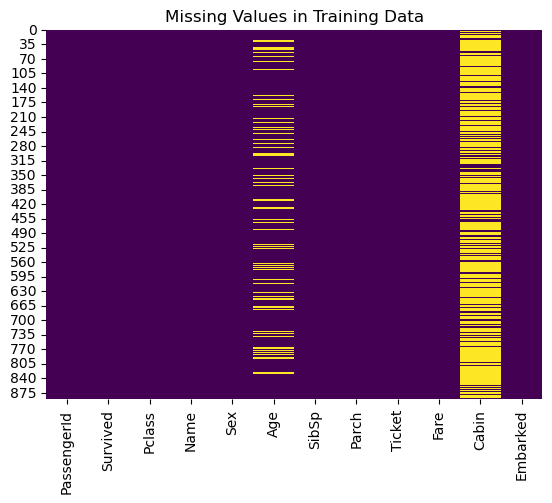

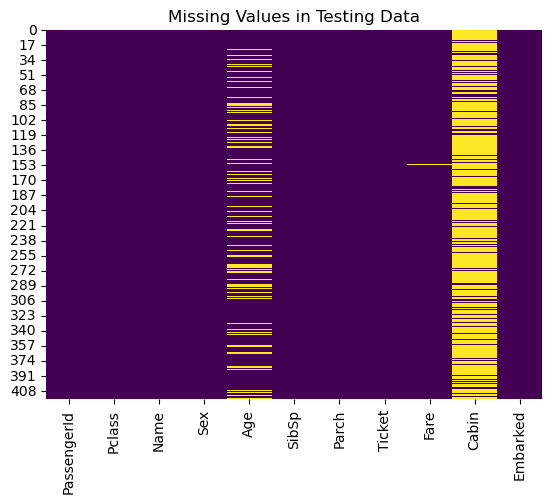

In [16]:
#Vizualising missing data
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Training Data')
plt.show()

sns.heatmap(test_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Testing Data')
plt.show()


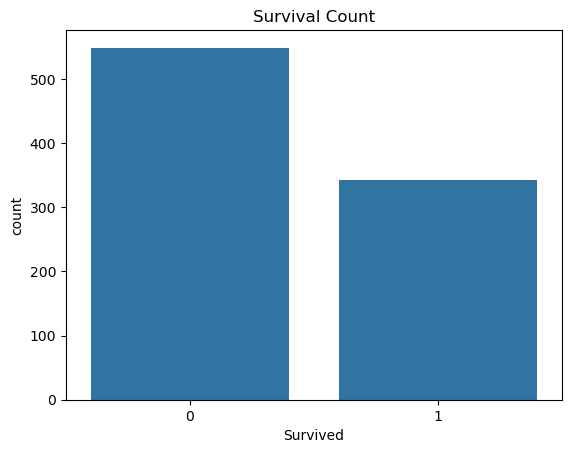

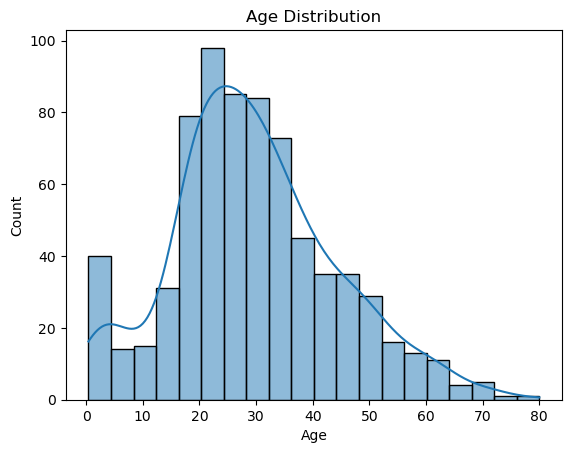

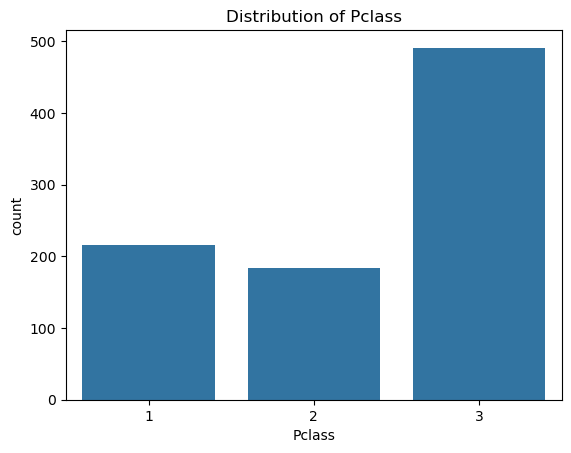

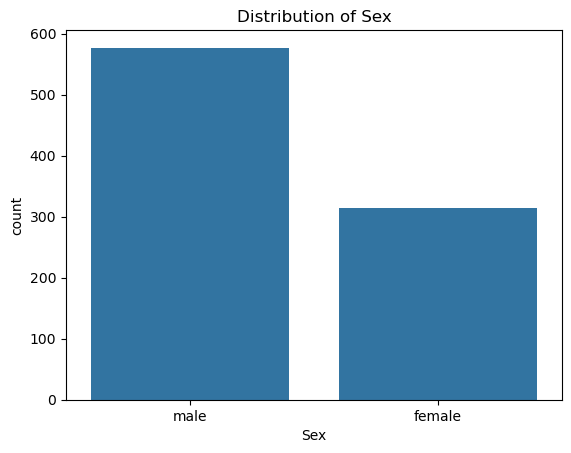

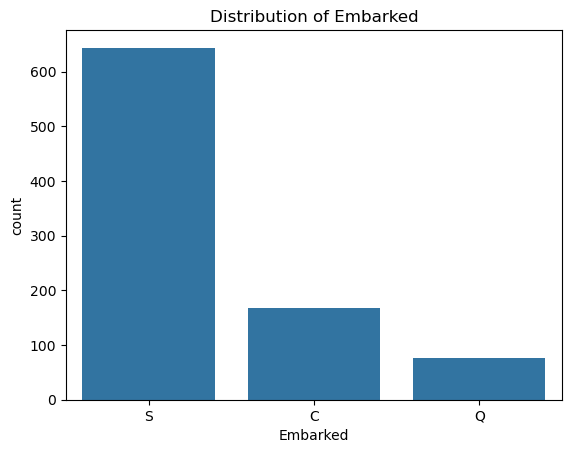

In [17]:
#Univariate Analysis
# Distribution of the 'Survived' column
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()

# Distribution of 'Age'
sns.histplot(train_data['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Categorical features
categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    sns.countplot(x=feature, data=train_data)
    plt.title(f'Distribution of {feature}')
    plt.show()


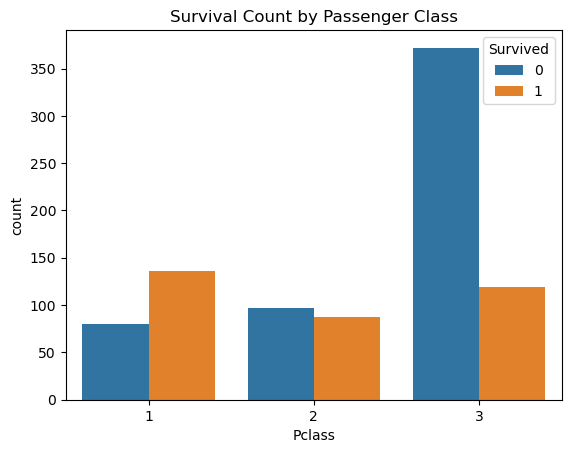

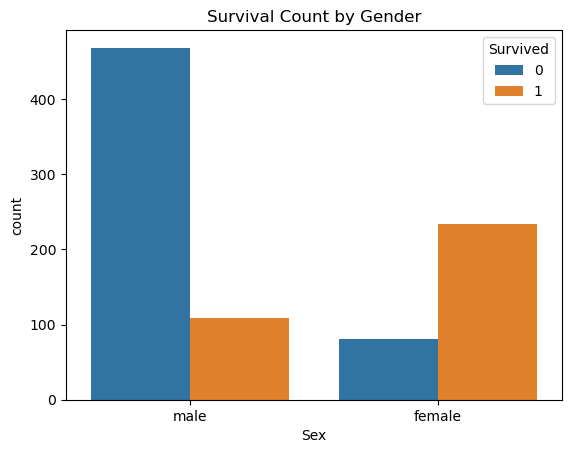

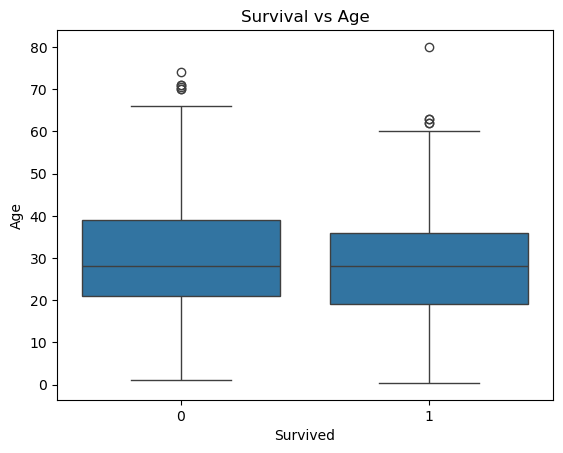

In [18]:
#Bivariate Analysis
# Relationship between 'Survived' and 'Pclass'
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival Count by Passenger Class')
plt.show()

# Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival Count by Gender')
plt.show()

# Survival vs Age
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title('Survival vs Age')
plt.show()


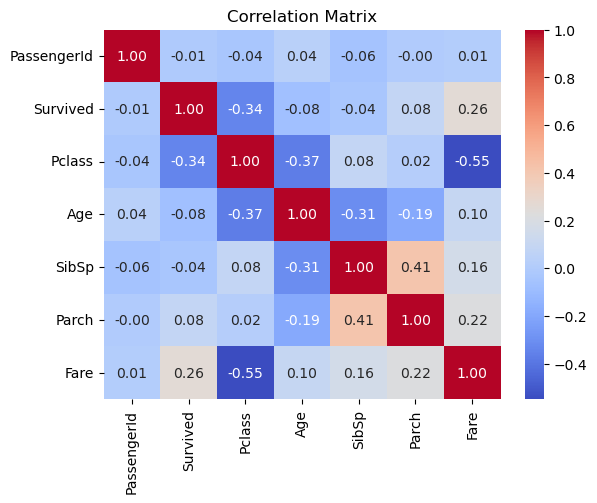

In [19]:
#Correlation Matrix

numeric_cols = train_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [21]:

# Impute missing values in 'Age' with median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

# Fill missing 'Embarked' with mode
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# Fill missing 'Fare' in test data with median
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())


In [22]:
# Check for remaining missing values in the datasets
print("Missing values in train_data after imputation:")
print(train_data.isnull().sum())

print("\nMissing values in test_data after imputation:")
print(test_data.isnull().sum())


Missing values in train_data after imputation:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Missing values in test_data after imputation:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [23]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)
